# AI - BE1 - Part 2 : Neural Network

## Packages

In [1]:
import numpy as np
from scipy.spatial import distance_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42) # pour que l'exécution soit déterministe

In [3]:
path = r"C:/Users/Tim/Desktop/ECL/3A/Deep learning IA/cifar-10-batches-py/"

In [4]:
def viz(X,idx):#visualizing train sample
    temp = X[idx].astype("int")

    # Since every row represents one example to re-map it to image we have to form three 32,32 matrix,
    #representing RGB values

    R = temp[0:1024].reshape(32,32)
    G = np.reshape(temp[1024:2048],newshape=(32,32))
    B = np.reshape(temp[2048:],newshape=(32,32))
    temp = np.dstack((R,G,B))   #for stacking all these 32,32 matrices.
    plt.imshow(temp)
    plt.show()

In [5]:
def sample(X, Y, N):
    
    index = np.random.choice(X.shape[0], N, replace=False)
    
    return X[index], Y[index]

In [6]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [7]:
def lecture_cifar(directory):
    X = np.empty((0,3072))
    Y = np.array([])
    for i in range(5):
        path = directory + "data_batch_" +str(i+1)
        D = unpickle(path)
        X = np.concatenate((X,D[b"data"]),axis = 0)
        Y = np.concatenate((Y,D[b"labels"]),axis= 0)
        X.astype('float32')
        Y.astype('float32')
    return np.array(X),np.array(Y)

In [8]:
X,Y= lecture_cifar(path)

In [9]:
X,Y = sample(X,Y,2000)

In [10]:
def decoupage_donees(X,Y):
    Xapp,Xtest,Yapp,Ytest  = train_test_split(X, Y, test_size=0.2,random_state=42)
    return Xapp,Yapp,Xtest,Ytest

In [11]:
Xapp,Yapp,Xtest,Ytest = decoupage_donees(X,Y)

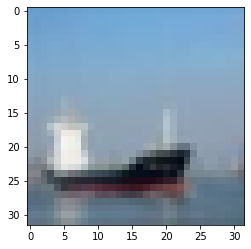

In [12]:
viz(Xtest,29)

In [13]:
def evaluation_classifieur(Ytest,Ypred):
    return accuracy_score(Ytest,Ypred)

In [14]:
#############################################
# FONCTIONS D'AIDE
############################################
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_d(x):
    return sigmoid(x)*(1-sigmoid(x))

def reLu(x):
    return max(0,x)

def reLu_d(x):
    if x>0:
        return 1
    return 0

def softmax(X):
    exps = np.exp(X)
    return exps / np.sum(exps)

In [15]:
#############################################
# encoder les labels en one-hot pour matcher la sortie du réseau
############################################
def one_hot(Y):
    res = []
    for i,x in enumerate(Y):
        res.append(np.array([ int(j==int(x)) for j in range(10) ])) 
    return res

In [17]:
##########################
# Classe Réseau de neurones#
##########################
class reseau:
    ##########################
    # Génération des données #
    ##########################
    # N est le nombre de données d'entrée
    # D_in est la dimension des données d'entrée
    # D_h le nombre de neurones de la couche cachée
    # D_out est la dimension de sortie (nombre de neurones de la couche de sortie)
    def __init__(self,N,D_in,D_out,D_h):
        self.N, self.D_in,  self.D_out,self.D_h = N , D_in , D_out, D_h
        # Création d'une matrice d'entrée X et de sortie Y avec des valeurs aléatoires
        X = np.random.random((N, D_in))
        Y = np.random.random((N, D_out))
        # Initialisation aléatoire des poids du réseau
       
    def build_NN(self): 
        self.W1 = 2 * np.random.random((self.D_in, self.D_h)) - 1
        self.b1 = np.zeros((1,self.D_h))
        self.W2 = 2 * np.random.random((self.D_h, self.D_out)) - 1
        self.b2 = np.zeros((1,self.D_out))
        
    def forward(self,X):
        ####################################################
        # Passe avant : calcul de la sortie prédite Y_pred #
        ####################################################
        I1 = X.dot(self.W1) + self.b1 # Potentiel d'entrée de la couche cachée
        self.O1 = sigmoid(I1) # Sortie de la couche cachée (fonction d'activation de type sigmoïde)
        I2 = self.O1.dot(self.W2) + self.b2 # Potentiel d'entrée de la couche de sortie
        self.O2 = softmax(I2) # Sortie de la couche de sortie (fonction d'activation de type sigmoïde)
        Y_pred = self.O2 # Les valeurs prédites sont les sorties de la couche de sortie
        return Y_pred
    
    def loss(self,Y,Y_pred):
        ########################################################
        # Calcul et affichage de la fonction perte de type MSE #
        ########################################################
        return np.mean(np.sum(np.square(Y_pred - Y)))
    
        
    def gradient_descent(self,x,y,iterations,lr=0.001):
        for i in range(iterations):
            #i = i % len(x)
            X = x
            Y = y
            Y_pred = self.forward(X)
            loss = self.loss(Y,Y_pred)
            if i%100 ==0:
                print(i,loss)
            
            
            ######################################### 
            # Backward : calcul des differentielles # 
            #########################################
            #print(Y_pred[:,0].shape,Y.shape)
            #print(Y_pred[:,0],Y)
            #Y = Y.reshape((Y.shape[0], 1))
            dO2 = 2.0*(Y_pred-Y) # dL/dO2
            dI2 = self.O2*(1.-self.O2)*dO2 # dL/dI2
            #print(dO2.shape)
            #print(( self.O2*(1-self.O2)).shape)
            dW2 = self.O1.T.dot(dI2) # dL/dW2
            db2 = np.sum(dI2, axis=0) # dL/db2
            dI1 = self.O1*(1.-self.O1)*dI2.dot(self.W2.T) # dL/dI1
            
            dW1 = X.T.dot(dI1) # dL/dW1
            db1 = np.sum(dI1, axis=0) # dL/db1

            
            self.W1-= lr*dW1
            self.W2-= lr*dW2
            self.b1-= lr*db1
            self.b2-= lr*db2

In [18]:
#Construction d'un réseau à une couche cachée, de dimension 3072-->1000-->10
#Le vecteur de sortie est un vecteur de probabilités sur les classes
R = reseau(1600,3072,10,1000)
R.build_NN()
Yapp1 = one_hot(Yapp)

In [ ]:
# La descente de gradient ne semble pas converger, peut être qu'il n'est pas assez profo,d, ou qu'il faut mettre en place 
# une descente par batch pour accelérer la convergence
# De plus l'étude est faite sur un échantillon restreint de données et faute de puissance de calcul et d'optimisation
# de code, il est impossible de faire tourner ce réseau sur l'entièreté des données dans un temps raisonnable.
R.gradient_descent(Xapp,np.array(Yapp1),1000,lr=0.01)